In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [13]:
data_filename = "gyro_data2.txt"
names =['gx', 'gy', 'gz']
df= pd.read_csv("Datasets/" + data_filename, header=None, 
                sep="\t", delim_whitespace=False, names=names, na_values='?')
print("Data dimensions = ", df.shape)

x = df[['gx']].values
y = df[['gy']].values
z = df[['gz']].values

Data dimensions =  (1367, 3)


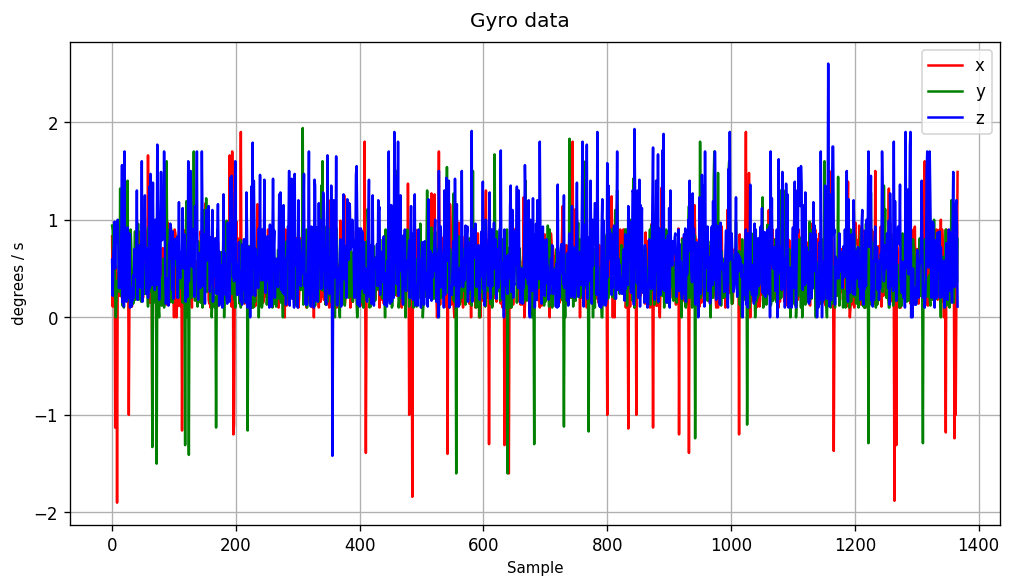

In [18]:
plt.figure(num=None, figsize=(10, 5), dpi=120)
plt.suptitle('Gyro data', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.plot(x, 'r')
plt.plot(y, 'g')
plt.plot(z, 'b')
plt.grid()
plt.legend(['x', 'y', 'z'], loc='upper right')
plt.ylabel("degrees / s", fontsize=9)
plt.xlabel("Sample", fontsize=9)
plt.show()

In [19]:
data_filename = "lsm_mag_corrected_data.csv"
names =['mx', 'my', 'mz']
df= pd.read_csv("Datasets/" + data_filename, header=None, 
                sep="\t", delim_whitespace=False, names=names, na_values='?')
print("Data dimensions = ", df.shape)
# df.head(3)
xy = df[['mx', 'my']].values
yz = df[['my', 'mz']].values
xz = df[['mx', 'mz']].values


Data dimensions =  (6888, 3)


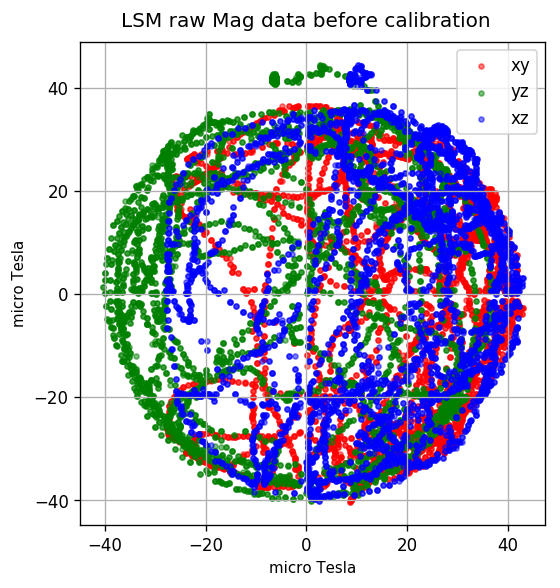

In [21]:
plt.close()
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('LSM raw Mag data before calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5, marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5, marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5, marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.grid()
plt.show()

In [ ]:

def MadgwickQuaternionUpdate(ax, ay, az, gx, gy,  gz, mx, my, mz,enum IMU x) 
    {
            float q1 , q2 , q3 , q4;
            switch(x)
            {
                case MPU_9150:
                    q1 = q_m[0]; q2 = q_m[1]; q3 = q_m[2]; q4 = q_m[3];
                    break;
                case LSM_9DS0:
                    q1 = q_l[0]; q2 = q_l[1]; q3 = q_l[2]; q4 = q_l[3];
                    break;
                default:
                    return;
            }
              // short name local variable for readability
            float norm;
            float hx, hy, _2bx, _2bz;
            float s1, s2, s3, s4;
            float qDot1, qDot2, qDot3, qDot4;
//            float gerrx, gerry, gerrz, gbiasx, gbiasy, gbiasz;        // gyro bias error

            // Auxiliary variables to avoid repeated arithmetic
            float _2q1mx;
            float _2q1my;
            float _2q1mz;
            float _2q2mx;
            float _4bx;
            float _4bz;
            float _2q1 = 2.0f * q1;
            float _2q2 = 2.0f * q2;
            float _2q3 = 2.0f * q3;
            float _2q4 = 2.0f * q4;
            float _2q1q3 = 2.0f * q1 * q3;
            float _2q3q4 = 2.0f * q3 * q4;
            float q1q1 = q1 * q1;
            float q1q2 = q1 * q2;
            float q1q3 = q1 * q3;
            float q1q4 = q1 * q4;
            float q2q2 = q2 * q2;
            float q2q3 = q2 * q3;
            float q2q4 = q2 * q4;
            float q3q3 = q3 * q3;
            float q3q4 = q3 * q4;
            float q4q4 = q4 * q4;

            // Normalise accelerometer measurement
            norm = sqrt(ax * ax + ay * ay + az * az);
            if (norm == 0.0f) return; // handle NaN
            norm = 1.0f/norm;
            ax *= norm;
            ay *= norm;
            az *= norm;

            // Normalise magnetometer measurement
            norm = sqrt(mx * mx + my * my + mz * mz);
            if (norm == 0.0f) return; // handle NaN
            norm = 1.0f/norm;
            mx *= norm;
            my *= norm;
            mz *= norm;

            // Reference direction of Earth's magnetic field
            _2q1mx = 2.0f * q1 * mx;
            _2q1my = 2.0f * q1 * my;
            _2q1mz = 2.0f * q1 * mz;
            _2q2mx = 2.0f * q2 * mx;
            hx = mx * q1q1 - _2q1my * q4 + _2q1mz * q3 + mx * q2q2 + _2q2 * my * q3 + _2q2 * mz * q4 - mx * q3q3 - mx * q4q4;
            hy = _2q1mx * q4 + my * q1q1 - _2q1mz * q2 + _2q2mx * q3 - my * q2q2 + my * q3q3 + _2q3 * mz * q4 - my * q4q4;
            _2bx = sqrt(hx * hx + hy * hy);
            _2bz = -_2q1mx * q3 + _2q1my * q2 + mz * q1q1 + _2q2mx * q4 - mz * q2q2 + _2q3 * my * q4 - mz * q3q3 + mz * q4q4;
            _4bx = 2.0f * _2bx;
            _4bz = 2.0f * _2bz;

            // Gradient decent algorithm corrective step
            s1 = -_2q3 * (2.0f * q2q4 - _2q1q3 - ax) + _2q2 * (2.0f * q1q2 + _2q3q4 - ay) - _2bz * q3 * (_2bx * (0.5f - q3q3 - q4q4) + _2bz * (q2q4 - q1q3) - mx) + (-_2bx * q4 + _2bz * q2) * (_2bx * (q2q3 - q1q4) + _2bz * (q1q2 + q3q4) - my) + _2bx * q3 * (_2bx * (q1q3 + q2q4) + _2bz * (0.5f - q2q2 - q3q3) - mz);
            s2 = _2q4 * (2.0f * q2q4 - _2q1q3 - ax) + _2q1 * (2.0f * q1q2 + _2q3q4 - ay) - 4.0f * q2 * (1.0f - 2.0f * q2q2 - 2.0f * q3q3 - az) + _2bz * q4 * (_2bx * (0.5f - q3q3 - q4q4) + _2bz * (q2q4 - q1q3) - mx) + (_2bx * q3 + _2bz * q1) * (_2bx * (q2q3 - q1q4) + _2bz * (q1q2 + q3q4) - my) + (_2bx * q4 - _4bz * q2) * (_2bx * (q1q3 + q2q4) + _2bz * (0.5f - q2q2 - q3q3) - mz);
            s3 = -_2q1 * (2.0f * q2q4 - _2q1q3 - ax) + _2q4 * (2.0f * q1q2 + _2q3q4 - ay) - 4.0f * q3 * (1.0f - 2.0f * q2q2 - 2.0f * q3q3 - az) + (-_4bx * q3 - _2bz * q1) * (_2bx * (0.5f - q3q3 - q4q4) + _2bz * (q2q4 - q1q3) - mx) + (_2bx * q2 + _2bz * q4) * (_2bx * (q2q3 - q1q4) + _2bz * (q1q2 + q3q4) - my) + (_2bx * q1 - _4bz * q3) * (_2bx * (q1q3 + q2q4) + _2bz * (0.5f - q2q2 - q3q3) - mz);
            s4 = _2q2 * (2.0f * q2q4 - _2q1q3 - ax) + _2q3 * (2.0f * q1q2 + _2q3q4 - ay) + (-_4bx * q4 + _2bz * q2) * (_2bx * (0.5f - q3q3 - q4q4) + _2bz * (q2q4 - q1q3) - mx) + (-_2bx * q1 + _2bz * q3) * (_2bx * (q2q3 - q1q4) + _2bz * (q1q2 + q3q4) - my) + _2bx * q2 * (_2bx * (q1q3 + q2q4) + _2bz * (0.5f - q2q2 - q3q3) - mz);
            norm = sqrt(s1 * s1 + s2 * s2 + s3 * s3 + s4 * s4);    // normalise step magnitude
            norm = 1.0f/norm;
            s1 *= norm;
            s2 *= norm;
            s3 *= norm;
            s4 *= norm;
            // Compute rate of change of quaternion
            qDot1 = 0.5f * (-q2 * gx - q3 * gy - q4 * gz) - beta * s1;
            qDot2 = 0.5f * ( q1 * gx + q3 * gz - q4 * gy) - beta * s2;
            qDot3 = 0.5f * ( q1 * gy - q2 * gz + q4 * gx) - beta * s3;
            qDot4 = 0.5f * ( q1 * gz + q2 * gy - q3 * gx) - beta * s4;

            // Integrate to yield quaternion
//            print_float(deltat);
//            UARTprintf(" - d ");
            q1 += qDot1 * deltat;
            q2 += qDot2 * deltat;
            q3 += qDot3 * deltat;
            q4 += qDot4 * deltat;
            norm = sqrt(q1 * q1 + q2 * q2 + q3 * q3 + q4 * q4);    // normalise quaternion
            norm = 1.0f/norm;
//            print_float(q2 * norm);
//            UARTprintf(" - q\n");


            switch(x)
            {
                case MPU_9150:
                    q_m[0] = q1 * norm;
                    q_m[1] = q2 * norm;
                    q_m[2] = q3 * norm;
                    q_m[3] = q4 * norm;
                    break;
                case LSM_9DS0:
                    q_l[0] = q1 * norm;
                    q_l[1] = q2 * norm;
                    q_l[2] = q3 * norm;
                    q_l[3] = q4 * norm;
                    break;
                default:
                    return;
            }
}